In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore') # It ignores all the warnings that can pop-up

#### Reading the dataset
 - As the 'u.data' dataset contains tab separated value, I'm using separator as '\t'
 - columnNames in the 'u.data' file can be read from the readme file and can be assigned as shown below:

In [3]:
columnNames = ['user_id','item_id','rating','timestamp']
df = pd.read_csv("ml-100k\\u.data",sep = '\t',names=columnNames)

In [4]:
print(df.shape) # Gives the shape that dataset contains 100k records into 4 columns

(100000, 4)


In [5]:
print(df.head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


 - Checking how many unique movies are there in the dataset and how many different users have given reviews

In [6]:
no_unique_users = df['user_id'].nunique()
print("No. unique users are: ",no_unique_users)
no_unique_movies = df['item_id'].nunique()
print("No. unique movies are: ",no_unique_movies)

No. unique users are:  943
No. unique movies are:  1682


 - Since, we don't know name of movies we can recall 'u.item' dataset which contains movie name and its id.

In [7]:
movie_titles = pd.read_csv('ml-100k\\u.item',sep='\|',header=None)
print(movie_titles.shape)

(1682, 24)


 - 'u.item'  file contains 1682 movie titles along with its genres and other related information separated along 23 columns

In [8]:
print(movie_titles.head())

   0                  1            2   3   \
0   1   Toy Story (1995)  01-Jan-1995 NaN   
1   2   GoldenEye (1995)  01-Jan-1995 NaN   
2   3  Four Rooms (1995)  01-Jan-1995 NaN   
3   4  Get Shorty (1995)  01-Jan-1995 NaN   
4   5     Copycat (1995)  01-Jan-1995 NaN   

                                                  4   5   6   7   8   9   ...  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...   0   0   0   1   1  ...   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...   0   1   1   0   0  ...   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...   0   0   0   0   0  ...   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...   0   1   0   0   0  ...   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)   0   0   0   0   0  ...   

   14  15  16  17  18  19  20  21  22  23  
0   0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   1   0   0  
2   0   0   0   0   0   0   0   1   0   0  
3   0   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0 

Since, we need only movie titles and movied ids, we extract only this information from the movie_titles dataframe

In [9]:
df_movie= movie_titles[[0,1]]

In [10]:
df_movie.columns = ['item_id','Title']

In [11]:
df_movie.head()

,item_id,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We can merge two dataframes so that we can have more precise dataset in a single dataframe based on similar item_id

In [12]:
new_df = pd.merge(df,df_movie,on='item_id')

In [13]:
new_df.tail()

,user_id,item_id,rating,timestamp,Title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


### Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('white')

Since, our dataframe consists of 100k reviews and there are only 1682 movies in total. It is clear that one person can
give more than one review or may be a movie can have multiple reviews.
Let's try to find out the movie with maximum average rating.

In [15]:
new_df.groupby('Title').mean()['rating'].sort_values(ascending=False)

Title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

It might be a possibility that only a few users have given rating to a movie and it has high rating.
So, recommending such movies will not be a feasible solution, so we can find out the count that which movie has
how many number of ratings.

In [16]:
new_df.groupby('Title').count()['rating'].sort_values(ascending=False)

Title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

This shows Star Wars movie has been reviewed 583 times, similarly Contact movie has been reviewed 509 times and so on.

 - We can combine these two attributes inside a single dataframe.

In [17]:
df_ratings = pd.DataFrame(new_df.groupby('Title').mean()['rating'])

In [18]:
df_ratings.head()

,rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
df_ratings['frequency_of_reviews'] = pd.DataFrame(new_df.groupby('Title').count()['rating'])

In [20]:
df_ratings.head()

,rating,frequency_of_reviews
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [21]:
df_ratings.sort_values(by = 'rating',ascending=False)

,rating,frequency_of_reviews
Title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


So, we can observe that few movies has ratings as high as 5.0  but it is only being reviewed once.
So, recommending such movies to a person will not be good.

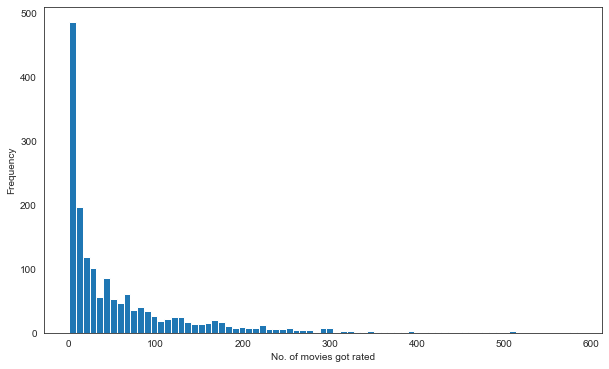

In [22]:
plt.figure(figsize=(10,6))
plt.hist(df_ratings['frequency_of_reviews'],bins=75)
plt.ylabel('Frequency')
plt.xlabel('No. of movies got rated')
plt.show()

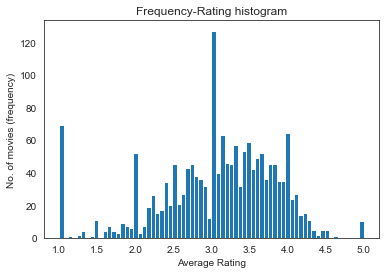

In [23]:
plt.hist(df_ratings['rating'],bins=70)
plt.title('Frequency-Rating histogram')
plt.xlabel('Average Rating')
plt.ylabel('No. of movies (frequency)')
plt.show()

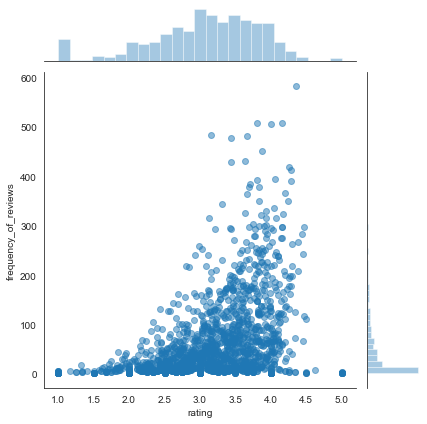

In [24]:
sb.jointplot(x= 'rating',y='frequency_of_reviews',data=df_ratings,alpha=0.5)

 - What, we can conclude from above histogram is the movies which has high average reviews has high frequency of reviews

### Creating Movie Recommendation

In [25]:
new_df.head()

,user_id,item_id,rating,timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


Creating a matrix in which rows contain the user_id and columns will contain movie_titles, then each cell will represent the movie rating given by that particular user to that movie.

In [26]:
movie_matrix = new_df.pivot_table(index='user_id',columns='Title',values='rating')

In [27]:
movie_matrix

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_ratings.sort_values('frequency_of_reviews',ascending=False)

,rating,frequency_of_reviews
Title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


The movie which has highest number of reviews (here Star Wars) will be a good choice when we need to compare with other movies. So, we calculate correlation of other movie's ratings with highest one( comparing others with Star Wars). 

In [29]:
star_wars_user_ratings = movie_matrix['Star Wars (1977)']
star_wars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

 - Correlating movie rating of star wars with whole movie_matrix

In [30]:
similarity_with_starwars = movie_matrix.corrwith(star_wars_user_ratings)

In [31]:
similarity_with_starwars

Title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

 - Correation value lies between -1 to 1, a value as 1 means it is highly correlated and  NaN value signifies that no user has rated both of those movies.
 We need to convert this into a dataframe and we can remove that NaN values.

In [34]:
corr_Starwars = pd.DataFrame(similarity_with_starwars,columns = ['Correlation'])
corr_Starwars.dropna(inplace=True)

In [35]:
corr_Starwars

,Correlation
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [39]:
corr_Starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
Title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0


 - This data signifies, suppose a person who likes Star Wars movie then, those movies which are highly in correlation to starwars will be recommened to him. But, still there are chances that there are movies which are reviwed by very less no. of people and correlation value is high, So, we need to set a threshold value for our general movie recommendation system.
 - Let's set a threshold value which signifies, if a movie has more than this no. of reviews than only it should be recommened. Thus, we can merge our two dataframes df_ratings (containing frequency_of_reviews) and corr_Starwars.

In [41]:
df3 = pd.merge(df_ratings,corr_Starwars,on='Title')
df3.head()

,rating,frequency_of_reviews,Correlation
Title,,,
'Til There Was You (1997),2.333333,9,0.872872
1-900 (1994),2.600000,5,-0.645497
101 Dalmatians (1996),2.908257,109,0.211132
12 Angry Men (1957),4.344000,125,0.184289
187 (1997),3.024390,41,0.027398


In [46]:
# Finding all those movies which has frequency of reviews greater than 100 and then sorting them in descending
# order based on the Correlation with Star Wars.

df3[df3['frequency_of_reviews']>100].sort_values(by = 'Correlation',ascending=False)

,rating,frequency_of_reviews,Correlation
Title,,,
Star Wars (1977),4.358491,583,1.000000
"Empire Strikes Back, The (1980)",4.204360,367,0.747981
Return of the Jedi (1983),4.007890,507,0.672556
Raiders of the Lost Ark (1981),4.252381,420,0.536117
Austin Powers: International Man of Mystery (1997),3.246154,130,0.377433
...,...,...,...
"Edge, The (1997)",3.539823,113,-0.127167
As Good As It Gets (1997),4.196429,112,-0.130466
Crash (1996),2.546875,128,-0.148507


### Defining a general movie predictor

In [47]:
def predict(movie_name):
    movie_user_ratings=movie_matrix[movie_name]
    similarity_with_movie = movie_matrix.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similarity_with_movie,columns = ['Correlation'])
    corr_movie.dropna(inplace=True)
    
    final_df = pd.merge(df_ratings,corr_movie,on='Title')
    final_prediction = final_df[final_df['frequency_of_reviews']>100].sort_values(by = 'Correlation',ascending=False)
    
    return final_prediction

In [49]:
recommended_movie = predict('Fargo (1996)')
recommended_movie.head()

,rating,frequency_of_reviews,Correlation
Title,,,
Fargo (1996),4.155512,508,1.000000
Sling Blade (1996),4.198529,136,0.381159
Lone Star (1996),4.053476,187,0.370915
Quiz Show (1994),3.645714,175,0.355031
Lawrence of Arabia (1962),4.231214,173,0.353408
